<a href="https://colab.research.google.com/github/NhaBaodang/AI_24_2/blob/main/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar100
import pandas as pd
(x_train,y_train),(x_test,y_test) = cifar100.load_data()
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

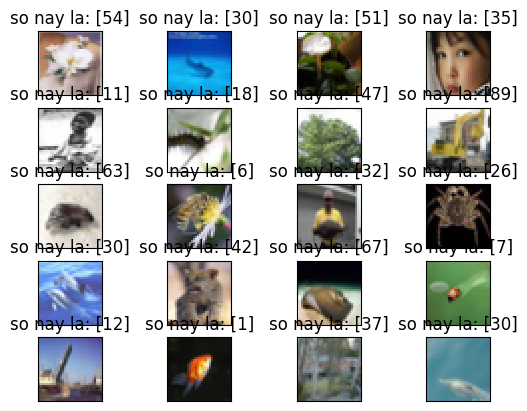

In [ ]:
import matplotlib.pyplot as plt
for i in range (20):
  plt.subplot(5,4,i+1)
  plt.tight_layout
  plt.imshow(x_train[i+1000],cmap='Blues',interpolation = 'None')
  plt.title('so nay la: {}'.format(y_train[i+1000]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(1024, activation = 'relu',input_shape=(32*32*3,)))
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 100)               102500    
                                                                 
Total params: 3,249,252
Trainable params: 3,249,252
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = x_train.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255
x_train.shape

(50000, 3072)

In [ ]:
x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255
x_test.shape

(10000, 3072)

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,100)
y_test=to_categorical(y_test,100)

In [ ]:

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=50,batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Do mat mat:',test_loss)
print('Do chinh xac:',test_acc)

Epoch 1/50
391/391 [==============================] - 23s 58ms/step - loss: 4.2280 - accuracy: 0.0725
Epoch 2/50
391/391 [==============================] - 22s 56ms/step - loss: 3.7726 - accuracy: 0.1305
Epoch 3/50
391/391 [==============================] - 24s 61ms/step - loss: 3.6292 - accuracy: 0.1531
Epoch 4/50
391/391 [==============================] - 23s 58ms/step - loss: 3.5338 - accuracy: 0.1730
Epoch 5/50
391/391 [==============================] - 22s 57ms/step - loss: 3.4591 - accuracy: 0.1851
Epoch 6/50
391/391 [==============================] - 21s 55ms/step - loss: 3.3981 - accuracy: 0.1985
Epoch 7/50
391/391 [==============================] - 22s 57ms/step - loss: 3.3500 - accuracy: 0.2082
Epoch 8/50
391/391 [==============================] - 22s 57ms/step - loss: 3.3009 - accuracy: 0.2168
Epoch 9/50
391/391 [==============================] - 23s 59ms/step - loss: 3.2738 - accuracy: 0.2220
Epoch 10/50
391/391 [==============================] - 21s 55ms/step - loss: 3.234

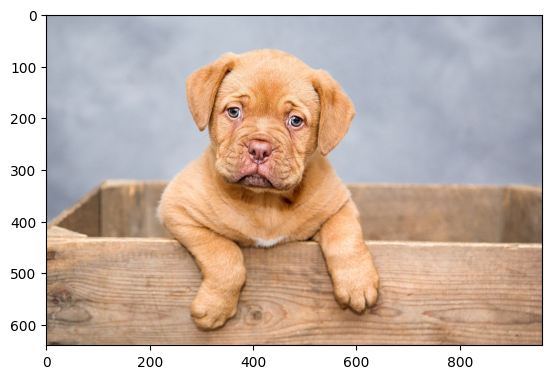

1/1 [==============================] - 0s 228ms/step


array([94])

In [ ]:
from keras.utils import load_img, img_to_array
import numpy as np

img =plt.imread('/content/puppy-1047521_960_720.jpg')
plt.imshow(img)
plt.show()

img = load_img('/content/puppy-1047521_960_720.jpg',target_size=(32,32))
img = img_to_array(img)
img=img.reshape(1,32*32*3)
img =img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)